# RANSAC Regression
Random Sample Consensus (RANSAC) is a well-known robust regression algorithm [3].
RANSAC tries to separate data into outliers and inliers and fits the model only on the inliers.
In this article we will only use RANSAC but almost all statements are true for the Huber Robust regression as well.

# Create the artificial dataset:-


### Our artificial dataset will consist of: one dependent variable (y) and one independent variable (X) with 1000 observations from which 50 are outliers.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
n_samples = 1000
n_outliers = 50
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
print("The independent variable X has {} observations/samples".format(X.shape[0]))
print("The dependent variable y has shape {}".format(y.shape))

The independent variable X has 1000 observations/samples
The dependent variable y has shape (1000,)


## Let’s also plot the data to visualize the artificial data and see the outliers.

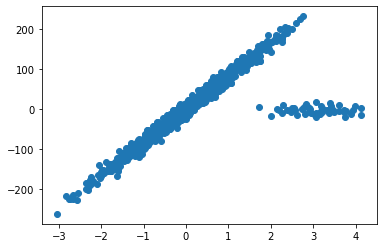

In [2]:
plt.scatter(X,y)
plt.show()

# The model fitting
### Now let’s fit a regular regression model and a robust model on the data and check the estimated regression coefficients.

In [4]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)


# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)


# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


# Visualizing the fitted regression lines

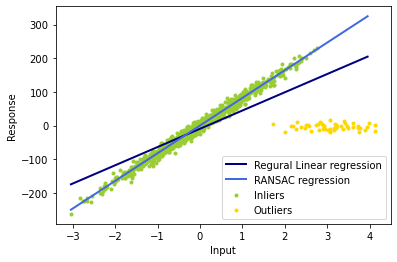

In [5]:
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Regural Linear regression')
plt.plot(line_X, line_y_ransac, color='royalblue', linewidth=lw, label='RANSAC regression')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()